In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [188]:
data=pd.read_csv('/content/flood.csv')

In [189]:
data.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [190]:
data=data.drop_duplicates()

In [191]:
data.shape

(50000, 21)

In [192]:
data.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [194]:
data.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


In [195]:
data.corr().FloodProbability

,FloodProbability
MonsoonIntensity,0.224081
TopographyDrainage,0.229414
RiverManagement,0.228917
Deforestation,0.220237
Urbanization,0.220867
ClimateChange,0.220986
DamsQuality,0.227467
Siltation,0.226544
AgriculturalPractices,0.221846
Encroachments,0.218259


In [196]:
x = data.iloc[:, :-1]
y=data.iloc[:, -1]

In [197]:
x.head(2)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3


In [198]:
y.head(2)

,FloodProbability
0,0.450
1,0.475


In [199]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0, test_size=0.2)


In [200]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain1=sc.fit_transform(xtrain)
xtest1=sc.transform(xtest)


In [201]:
models=[]
scores=[]

In [202]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=20, criterion='squared_error', max_depth=5, random_state=42)
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)


In [203]:
from sklearn.metrics import r2_score

In [204]:
 rf_score=r2_score(ytest, ypred)
 rf_score


0.2871795495636278

In [205]:
models.append('Random Forest')
scores.append(rf_score)

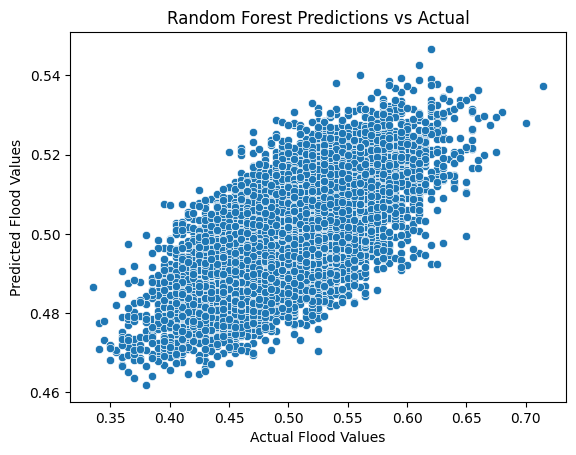

In [206]:
sns.scatterplot(x=ytest, y=ypred)
plt.xlabel("Actual Flood Values")
plt.ylabel("Predicted Flood Values")
plt.title("Random Forest Predictions vs Actual")
plt.show()

In [207]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=0
)
xgb.fit(xtrain, ytrain)
ypred = xgb.predict(xtest)


In [208]:
xgb_score=r2_score(ytest, ypred)
xgb_score


0.9568541025629601

In [209]:
models.append('XGBoost')
scores.append(xgb_score)

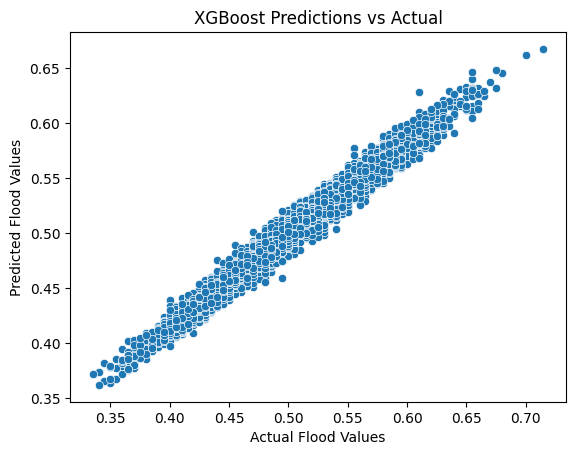

In [210]:
sns.scatterplot(x=ytest, y=ypred)
plt.xlabel("Actual Flood Values")
plt.ylabel("Predicted Flood Values")
plt.title("XGBoost Predictions vs Actual")
plt.show()

In [211]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(xtrain1,ytrain)
ypred=svr.predict(xtest1)

In [212]:
from sklearn.metrics import r2_score
svr_score=r2_score(ytest, ypred)
svr_score

0.7128660744851161

In [213]:
models.append('SVR')
scores.append(svr_score)

In [214]:
models

['Random Forest', 'XGBoost', 'SVR']

In [215]:
scores

[0.2871795495636278, 0.9568541025629601, 0.7128660744851161]

In [216]:
red = '#D76F80'

In [217]:
percentage_scores = [score*100 for score in scores]

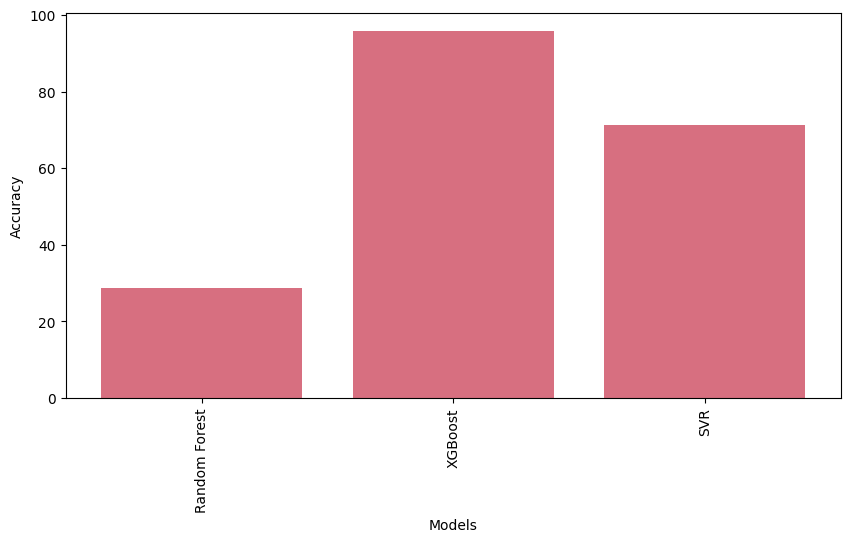

In [218]:
plt.figure(figsize=(10,5))
plt.bar(models, percentage_scores, color = red)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation = 90)
plt.show()


In [219]:
results = pd.DataFrame(list(zip(models, percentage_scores)), columns =['Models', 'Accuracy (%)'])


In [220]:
results

,Models,Accuracy (%)
0,Random Forest,28.717955
1,XGBoost,95.685410
2,SVR,71.286607
